In [19]:
#import libraries 
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
#folder shortcut
path = r'/Users/drich/Desktop/Citi Bike'

In [4]:
citi = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'citi_NEW6.4.csv'), index_col = False)

In [5]:
citi.head()

Unnamed: 0 day_of_week  start_hour  start_station_id  \
0           0         Mon          18               523   
1           1         Thu          18               257   
2           2         Wed          19               479   
3           3         Sat          11               527   
4           4         Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber        1968  female   
1             -73.987140            581  Subscriber        1983    male   
2             -73.988639            361  Subscriber        1989    male   
3             -73.967416            561  Subscriber        1988  female   
4             -73.983799            427  Subscriber        1986  female   

     end_of_ride        start_of_ride  
0   9/9/13 18:35  2013-09-09 18:18:00  
1  9/12/13 18:48  2013-09-12 18:38:00  
2  9/18/13 19:50  2013-09-18 19:44:00  
3  9/28/13 12:03  2013-09-28 11:54:00  
4  9/27/13 22:08  2013-09-27 22:01:00

In [7]:
citi.shape

(41017, 17)

In [10]:
citi = citi.drop('Unnamed: 0', axis=1)

In [11]:
citi.head()

day_of_week  start_hour  start_station_id       start_station_name  \
0         Mon          18               523          W 38 St & 8 Ave   
1         Thu          18               257  Lispenard St & Broadway   
2         Wed          19               479          9 Ave & W 45 St   
3         Sat          11               527          E 33 St & 1 Ave   
4         Fri          22               293    Lafayette St & E 8 St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               40.754666               -73.991382             334   
1               40.719392               -74.002472             236   
2               40.760193               -73.991255             513   
3               40.743156               -73.974347             441   
4               40.730287               -73.990765             432   

      end_station_name  end_station_latitude  end_station_longitude  \
0      W 20 St & 7 Ave             40.742388             -73.997262   
1  St Marks Pl & 2 Ave             40.728419             -73.987140   
2     W 56 St & 10 Ave             40.768254             -73.988639   
3      E 52 St & 2 Ave             40.756014             -73.967416   
4    E 7 St & Avenue A             40.726218             -73.983799   

   trip_duration  subscriber  birth_year  gender    end_of_ride  \
0            993  Subscriber        1968  female   9/9/13 18:35   
1            581  Subscriber        1983    male  9/12/13 18:48   
2            361  Subscriber        1989    male  9/18/13 19:50   
3            561  Subscriber        1988  female  9/28/13 12:03   
4            427  Subscriber        1986  female  9/27/13 22:08   

         start_of_ride  
0  2013-09-09 18:18:00  
1  2013-09-12 18:38:00  
2  2013-09-18 19:44:00  
3  2013-09-28 11:54:00  
4  2013-09-27 22:01:00

In [ ]:
# Drop categorical columns

citi.drop(['end_of_ride', 'start_of_ride', 'day_of_week', 'start_station_name', 'start_station_id', 'end_station_id', 'start_station_longitude','start_station_latitude','end_station_name','end_station_latitude','end_station_longitude','subscriber', 'birth_year', 'gender'], axis=1, inplace=True)

In [16]:
citi.head()

start_hour  trip_duration
0          18            993
1          18            581
2          19            361
3          11            561
4          22            427

In [20]:
#define a range of potential numbers of clusters in the data 
#choosing 1-10 like in the Exercise
num_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

In [22]:
#after applying range, then apply k-means algorithm 
score = [kmeans[i].fit(citi).score(citi) for i in range(len(kmeans))]
#this will output a list of scores

/Users/drich/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/drich/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/drich/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/drich/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [23]:
#list score
score

[-6736643410.562313,
 -1992054249.8902576,
 -949129226.5987972,
 -550933545.9115846,
 -363694241.6299601,
 -253551671.9230878,
 -189133221.89129055,
 -146675135.6540149,
 -116555709.77621253]

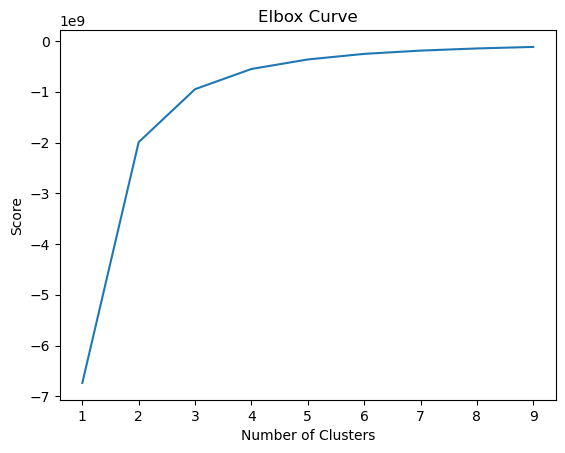

In [24]:
#plot the elbow curve 
pl.plot(num_clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbox Curve')
pl.show()

Explain why you chose that number in a markdown cell.

I chose this number (4) because--as this data limits me to these factors for data to not be skewed--the data I am using is in better adherence to other visuals because too many numbers would be numerically spaced out, leading to a pretty major elbow curve here. This does still tell us about the relationship as it stands so it is still a benefit to the information we are divugling.

In [25]:
#create the k-means object
kmeans = KMeans(n_clusters = 4)

In [26]:
#fit kmeans object to dataframe 
kmeans.fit(citi)

/Users/drich/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

After kmeans, attach new column with new info

In [27]:
#create column in dataframe with values corresponding to clusters 
citi['clusters'] = kmeans.fit_predict(citi)

/Users/drich/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
#check the dataframe to see the new column 
citi.head()

start_hour  trip_duration  clusters
0          18            993         0
1          18            581         3
2          19            361         1
3          11            561         3
4          22            427         1

In [31]:
#count the clusers 
citi['clusters'].value_counts()

1    14493
3    13409
0     8368
2     4747
Name: clusters, dtype: int64

### Visualizations based on clusters

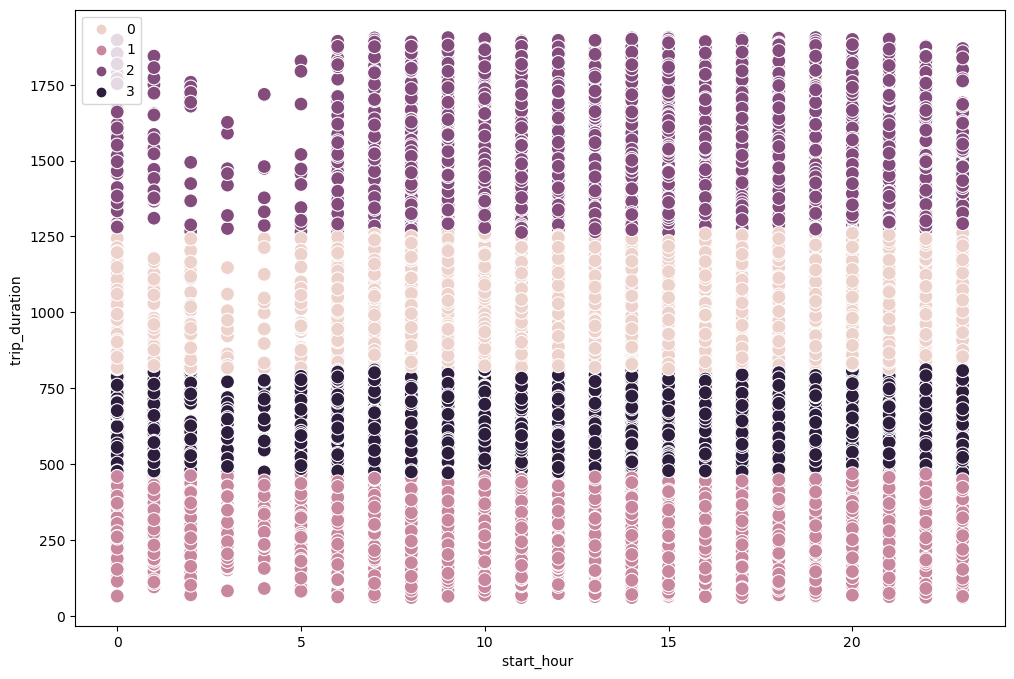

In [32]:
#plot population vs cases 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citi['start_hour'], y=citi['trip_duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_hour ') # Label x-axis.
plt.ylabel('trip_duration ') # Label y-axis.
plt.show()

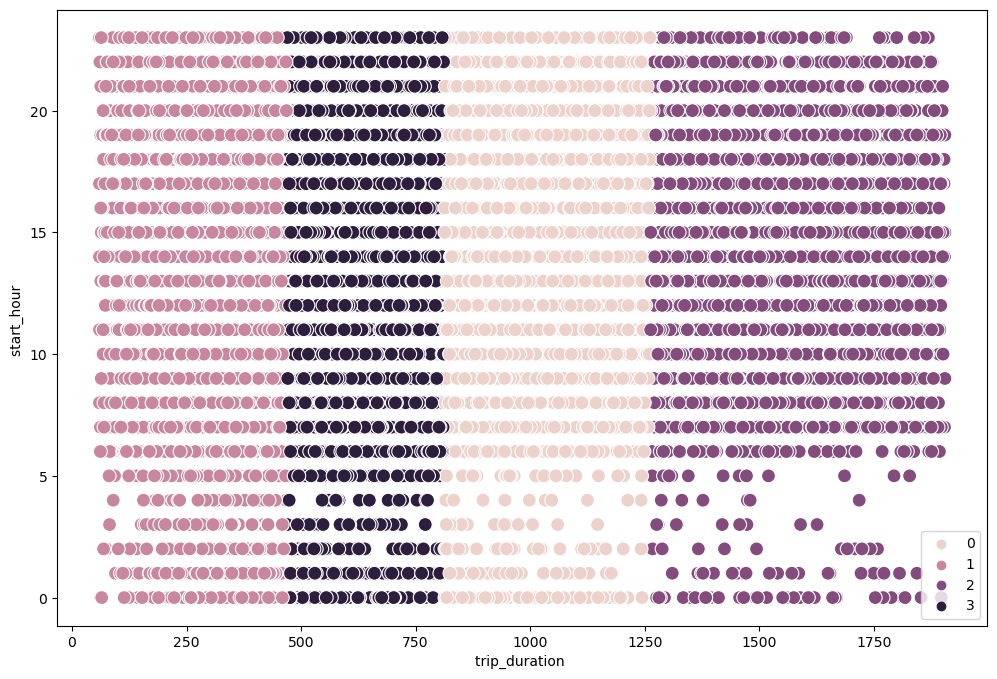

In [33]:
#plot population vs cases 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citi['trip_duration'], y=citi['start_hour'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('trip_duration ') # Label x-axis.
plt.ylabel('start_hour ') # Label y-axis.
plt.show()

Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell.

     This data clustering does, in fact, make sense. That being said, I was only able to measure the two numeric values against one another as most of my data I am working with is based on much more qualitatively related information because I am analyzing station names, locations, IDs, genders, subscriptions statuses, etc. 
     
     I wanted to see which graph would make more sense and I feel more inclinced to the latter graph because it gives a chronological feel to the graph as the start hour of a trip relates to the entire trip duration. This tells us that the numerical data we have in this set is useful in telling us that the shortest and least frequent trips are beginning between 11 PM and 5 AM.

In [34]:
#create a column that renames the clusters to colors 
citi.loc[citi['clusters'] == 3, 'cluster'] = 'black'
citi.loc[citi['clusters'] == 2, 'cluster'] = 'dark purple'
citi.loc[citi['clusters'] == 1, 'cluster'] = 'purple'
citi.loc[citi['clusters'] == 0, 'cluster'] = 'pink'

In [36]:
citi.groupby('cluster').agg({
    'start_hour':['mean','median'],
    'trip_duration':['mean','median']
})

start_hour        trip_duration        
                  mean median          mean  median
cluster                                            
black        14.004176   15.0    622.177791   614.0
dark purple  14.526648   16.0   1520.322730  1487.0
pink         14.272945   15.0   1005.810229   991.0
purple       13.841372   14.0    316.824536   326.0

### Propose what these results could be useful for in future steps of an analytics pipeline.

#### This data is actually going to be very useful during my future steps because it tells us the numerical data we have in this set is useful byshowing that the shortest and least frequent trips are beginning between 11 PM and 5 AM. This gives us timing to discuss and talk about popluarity during hours and specifics surounding trip durations as they relate to start times and time of the day in general. I will be able to use this information alongside these visualizations to create an arguent over the information we have learned here.